In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Linear Regression

## 1. Top-level

### 1.1 High-level explanation

Linear regression predicts a target value by describing the relationships between the input data and the target value, under the assumption of a linear dependence. i.e.

$$
y = wx + b.
$$

Wherein $y$ is the target value, $x$ is the input data, and $w$ is the linear coefficient of description.

A closed form solution exists to finding this representation. Consider the simple example of 

$$
y = 3x+1
$$

with only 3 supplied data points. The goal is to recapture the ground truth line of $3x+1$.

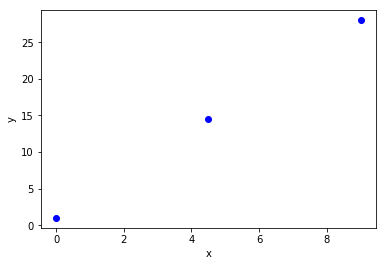

In [13]:
x = np.linspace(0,9,3)
target_y = 3*x+1
plt.plot(x, target_y, 'bo', label='data')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We can represent the data in the following matrix form, such that each row is a data point and each column is the feature of interest:

$$
Y = wX + b
$$

$$
\begin{bmatrix}
1 \\ 
14.5 \\ 
28
\end{bmatrix} = w\begin{bmatrix} 
0 \\
4.5 \\
9
\end{bmatrix}+b.
$$

Absorbing $b$ into the weight matrix:

$$
\begin{bmatrix}
1 \\ 
14.5 \\ 
28
\end{bmatrix} = \begin{bmatrix}
w \\ 
b 
\end{bmatrix}
\begin{bmatrix}
0 & 1\\ 
4.5 & 1 \\ 
9 & 1
\end{bmatrix}.
$$

With some fancy matrix identities (derivation below) we can find the weight matrix with the following equation:

$$
W = \left ( X^T X \right )^{-1} X^T Y.
$$

In [37]:
X = np.array([
    [0,1],
    [4.5,1],
    [9,1]
])
Y = np.array([
    [1],
    [14.5],
    [28]
])

W = np.linalg.inv( (X.T).dot(X) ).dot(X.T).dot(Y)
print("The equaiton for the line is y = {:.0f}x + {:.0f}".format(*W.flatten()))

The equaiton for the line is y = 3x + 1


In practice, obtaining the answer analytically is impractical. Instead we obtain the solution numerically - typically using gradient decent (discussed below).

### 1.2 What scenario should you use linear regression?

Linear regression is an appropriate choice for predicting continuous target values, $y$, from continuous descriptive variables, $x_i$. It is commonly used in scenarios where the speed of predicting the target value is most desired attribute, and where less emphasis needs to be placed on accuracy of the prediction.

### 1.3 What types of features does the model use?

#### 1.3.1 Linear dependence

Linear regression works on the fundamental principle that the predicted target value, $y$, is a linear combination of the descriptive values, $x_i$. Because of this, a significant amount of care needs to be taken in the construction of the model's feature set (descriptive values).

An example of this is any prediction where the target is a direct linear combination of the descriptive values. Lets consider the case

$$
y = w_1 x_1 + w_2 x_2.
$$

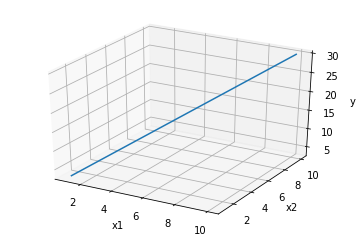

In [12]:
x1 = np.linspace(1,10, 100)
x2 = np.linspace(1, 10, 100)
y = 2*x1 + 1*x2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

Where it should be obvious that $y$ is a linear combination of $x_i$.

A problem which might be less intuitive is the application of linear regression to finding the target values to a function of the form

$$
y = w_1 x + w_2 x^2
$$

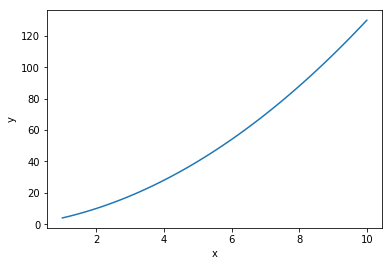

In [11]:
x = np.linspace(1,10, 100)
y = 3*x + x**2
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

It might seem like this problem is non-linear; However, an important thing to remember is that linear regression only requires the problem to be **linear w.r.t. the coefficients of the descriptive variables**. To understand this, consider the above example, but rewritten as 

$$
\begin{align}
y  &= w_1 x + w_2 x^2 \\
 &= w_1 x_1 + w_2 x_2, \\
{\rm with}\quad  x_1  &= x \\
x_2 &= x^2.
\end{align}
$$


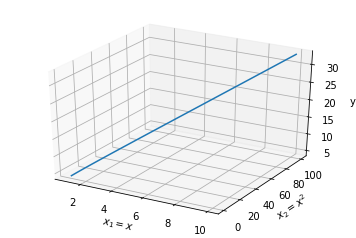

In [10]:
x1 = np.linspace(1,10, 100)
x2 = x**2
y = 3*x + 1*np.sqrt(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, y)
ax.set_xlabel("$x_1=x$")
ax.set_ylabel("$x_2=x^2$")
ax.set_zlabel("y")
plt.show()

This shows that the non-linear term in $x$ can be treated as a separate feature. That is, by considering an extra dimension to the problem, we can absorb the non-linear behavior into a linear representation. 

If the target values are not a linear combination w.r.t. the weights, such as

$$
y = w^x,
$$

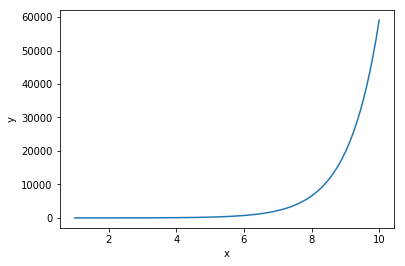

In [38]:
x = np.linspace(1,10, 100)
y = 3**x
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

all hope is not lost. Consider a decomposition of the form

$$
\log(y) = x\log(w).
$$

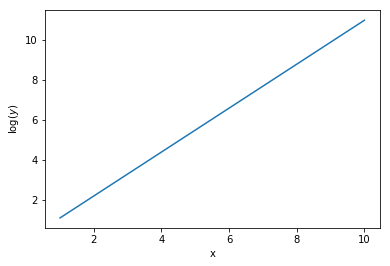

In [40]:
plt.plot(x, np.log(y))
plt.xlabel("x")
plt.ylabel("$\log(y)$")
plt.show()

It should be obvious now that a significant amount of feature engineering is required to construct a linear regression model which accurately describes the target values. Doing this requires careful cleaning of the dataset and sufficient domain knowledge, such that the form of the equation is known *a priori*, and linear regression is only used to solve for the unknown dependencies, $w_i$.

#### 1.3.2 Noisy Data

Linear regression assumes random variation in the predicted data points i.e. variation described by a Gaussian distribution. **[check this]** 

This limitation comes out of the typical loss functions used, such as mean squared error:

$$
{\rm loss} = \sum_i^N \left ( W^T X - Y \right )^2
$$

Where the model will converge to a minimal loss when $W^TX$ describes a line along the mean of the distributed data points, $Y$.

Because of this, outliers can have a significant effect on this model - as this error is amplified by the exponent. 

### 1.4 When the model breaks & what's a good backup?


If a linear dependence is not obtainable or if the appropriate equation can not be assumed, linear regression will fail. Depending on your application, you need to decide if the introduced errors from this are within your range of acceptability. If they are not, a new model will need to be implemented. 

Typical replacements for linear regression are:
 - ?
 


## 2. A bit more detail

### 2.1 Normalization of data 

Normalizing data is critical for application of linear regression. To emphasize this, consider an example of predicting housing prices based on yard size and number of bedrooms in the house. The yard size will be of order $1000 \,{\rm ft}^2$ while the number of bedrooms might range from 0-5 (for the sake of this argument, consider fractional bedrooms...). Because slight variations in in the yard size lead to a larger MSE, the loss function will preferentially try to optimize to this variable. When in actuality, the difference between 2 and 7 bedrooms might have a more significant effect on the price of the house.   

### 2.1 Loss function

#### 2.1.1 Mean Squared Error (L2 loss)

The most commonly used error function for linear regression is the MSE:

$$
{\rm loss} = \sum_i^N \left ( W^T X - Y \right )^2
$$

This has the benifite that the solution is unique, and that the model can approach it stabily. However, some drawback to it include its suseptibility to error due to placing heavy weight on any outlier data points.

#### 2.1.2 Absolute Value (L1 loss)

Another loss function, which is less commonly used is the absolute value:

$$
{\rm loss} = \sum_i^N \left | W^T X - Y \right |
$$

## 3. In-depth

### 3.1 Derivation of the analytic solution

### 3.2 Derivation of gradient decent

### 3.3 Simple implementation